In [138]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Considerações iniciais

vamos inicialmente ler o conjunto de dados, que está no drive. Logo em seguida vamos criar um data frame que ao longo das análises, será incrementado com as features que possuem influência na taxa de mortes

In [140]:
dataset = pd.DataFrame()
data = pd.read_csv("/mydrive/projeto_mineracao/dataset_insuficiencia_cardiaca.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Análise das variáveis binárias

## Analises com 1 parâmetro

No conjunto de dados disponibilizados, os dados binários são:


*   anaemia
*   diabetes
*   sex
*   smoking
*   high_blood_pressure

Então inicialmente vamos analisar esses dados, e ver a influência deles, em porcentagem, na taxa de mortes

### Taxa de mortes com hipertensos

In [141]:
cont = data[['DEATH_EVENT','high_blood_pressure']].value_counts()

hipertensao = data[['high_blood_pressure','DEATH_EVENT']].groupby('high_blood_pressure', as_index=False).mean() * 100

dataset["morreu"] = data[['DEATH_EVENT']]
dataset["hipertensao"] = data[['high_blood_pressure']]


hipertensao

,high_blood_pressure,DEATH_EVENT
0,0,29.381443
1,100,37.142857


### Taxa de mortes com anêmicos

In [142]:
cont2 = data[['DEATH_EVENT','anaemia']].value_counts()

anemia = data[['anaemia','DEATH_EVENT']].groupby('anaemia', as_index=False).mean() * 100

dataset["anemia"] = data[['anaemia']]
anemia

,anaemia,DEATH_EVENT
0,0,29.411765
1,100,35.658915


### Taxa de mortes com diabéticos

In [143]:
cont3 = data[['DEATH_EVENT','diabetes']].value_counts()

diabetes = data[['diabetes','DEATH_EVENT']].groupby('diabetes', as_index=False).mean() * 100

diabetes

,diabetes,DEATH_EVENT
0,0,32.183908
1,100,32.000000


### Taxa de mortes com fumantes

In [144]:
cont4 = data[['DEATH_EVENT','smoking']].value_counts()

fumante = data[['smoking','DEATH_EVENT']].groupby('smoking', as_index=False).mean() * 100

fumante

,smoking,DEATH_EVENT
0,0,32.512315
1,100,31.250000


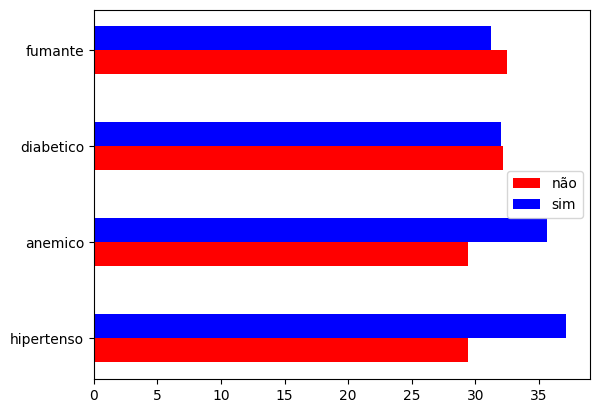

In [145]:
gp1 = [hipertensao['DEATH_EVENT'][0], anemia['DEATH_EVENT'][0], diabetes['DEATH_EVENT'][0], fumante['DEATH_EVENT'][0]]
gp2 = [hipertensao['DEATH_EVENT'][1], anemia['DEATH_EVENT'][1], diabetes['DEATH_EVENT'][1], fumante['DEATH_EVENT'][1]]

comprimento = 0.25
lenth = [1,2,3,4]
plt.barh(lenth, gp1, height=comprimento , color='red', label="não")
plt.barh([i+comprimento for i in lenth], gp2 , height=comprimento, color='blue', label="sim")
plt.yticks([i+(comprimento/2) for i in lenth], ['hipertenso','anemico','diabetico','fumante'])
plt.legend()
plt.show()

Com esses dados podemos observar que a taxa de mortos para pessoas fumantes e diabéticas é praticamente a mesma para as que não são, enquanto que para as que são anemicas e hipertensas a taxa de mortes é maior do que as que não são. 

## Analises com 2 parâmetros

Agora vamos combinar esses valores binários, para detectar se há um aumento na taxa de mortes, ou se elas não possuem tanta influência na taxa de mortos

### Taxa de mortes de hipertensos e anemicos

tendo em vista que a anemia e a hipertensão foram os dados que apresentaram maior influência na taxa de mortes, analizaremos esses dados combinados, e em seguida combinando eles com os outros, para vermos a sua influência na taxa de mortos

In [146]:
cont5 = data[['DEATH_EVENT','high_blood_pressure','anaemia']].value_counts().reset_index()

hipertensao_anemia = data[['high_blood_pressure','anaemia','DEATH_EVENT']].groupby(['high_blood_pressure','anaemia'], as_index=False).mean()
hipertensao_anemia['DEATH_EVENT'] = hipertensao_anemia['DEATH_EVENT'] * 100 
hipertensao_anemia


,high_blood_pressure,anaemia,DEATH_EVENT
0,0,0,26.548673
1,0,1,33.333333
2,1,0,35.087719
3,1,1,39.583333


### Taxa de mortes de hipertensos e fumantes

In [147]:
cont6 = data[['DEATH_EVENT','high_blood_pressure','smoking']].value_counts().reset_index()

dataset["hipertensos e fumantes"] = (data["high_blood_pressure"] & data["smoking"])

hipertensao_fumante = data[['high_blood_pressure','smoking','DEATH_EVENT']].groupby(['high_blood_pressure','smoking'], as_index=False).mean()
hipertensao_fumante['DEATH_EVENT'] = hipertensao_fumante['DEATH_EVENT'] * 100 
hipertensao_fumante

,high_blood_pressure,smoking,DEATH_EVENT
0,0,0,32.031250
1,0,1,24.242424
2,1,0,33.333333
3,1,1,46.666667


### Taxa de mortes de hipertensos e diabéticos

In [148]:
cont7 = data[['DEATH_EVENT','high_blood_pressure','diabetes']].value_counts().reset_index()

hipertensao_diabetes = data[['high_blood_pressure','diabetes','DEATH_EVENT']].groupby(['high_blood_pressure','diabetes'], as_index=False).mean()
hipertensao_diabetes['DEATH_EVENT'] = hipertensao_diabetes['DEATH_EVENT'] * 100 
hipertensao_diabetes

,high_blood_pressure,diabetes,DEATH_EVENT
0,0,0,30.357143
1,0,1,28.048780
2,1,0,35.483871
3,1,1,39.534884


### Taxa de mortes de anêmicos e diabéticos

In [149]:
cont8 = data[['DEATH_EVENT','anaemia','diabetes']].value_counts().reset_index()

anemia_diabetes = data[['anaemia','diabetes','DEATH_EVENT']].groupby(['anaemia','diabetes'], as_index=False).mean()
anemia_diabetes['DEATH_EVENT'] = anemia_diabetes['DEATH_EVENT'] * 100 
anemia_diabetes

,anaemia,diabetes,DEATH_EVENT
0,0,0,28.571429
1,0,1,30.555556
2,1,0,36.842105
3,1,1,33.962264


### Taxa de mortes de anêmicos e fumantes

In [150]:
cont9 = data[['DEATH_EVENT','anaemia','smoking']].value_counts().reset_index()

anemia_fumante = data[['anaemia','smoking','DEATH_EVENT']].groupby(['anaemia','smoking'], as_index=False).mean()
anemia_fumante['DEATH_EVENT'] = anemia_fumante['DEATH_EVENT'] * 100 
anemia_fumante

,anaemia,smoking,DEATH_EVENT
0,0,0,29.629630
1,0,1,29.032258
2,1,0,35.789474
3,1,1,35.294118


### Taxa de mortes de fumantes e diabéticos

In [151]:
cont10 = data[['DEATH_EVENT','diabetes','smoking']].value_counts().reset_index()

smoking_diabetes = data[['diabetes','smoking','DEATH_EVENT']].groupby(['diabetes','smoking'], as_index=False).mean()
smoking_diabetes['DEATH_EVENT'] = smoking_diabetes['DEATH_EVENT'] * 100 
smoking_diabetes

,diabetes,smoking,DEATH_EVENT
0,0,0,35.185185
1,0,1,27.272727
2,1,0,29.473684
3,1,1,40.000000


Com esses dados conseguimos perceber que mesmo combinadas esses parâmetros não aparentam ter muita influência sobre a taxa de mortes

# Analise das variáveis não binárias

Nesse conjunto de dados temos que as variáveis não binárias são:

*   age    
*   creatinine_phosphokinase    
*   ejection_fraction    
*   platelets    
*   serum_creatinine    
*   serum_sodium    
*   time        

Então inicialmente vamos analisar esses dados, categorizá-los, e ver a influência deles na taxa de mortes

## Taxa de mortes por idade

Para podermo ver melhor a influência da idade na taxa de mortes, é interesante dividíla em intevalos de tempo. Para isso dividi em 5 faixas de tempo iguais

In [152]:
max = data['age'].max()
min = data['age'].min()
qnt_divs = 5
passo = (max - min)/qnt_divs

dataset['idade'] = data['age'].astype(int)
idades = []
taxa   = []
inicio = min
fim    = min + passo
for i in range(qnt_divs):
  idade = data.loc[(data['age'] <= fim) & (data['age'] >= inicio)]
  dataset.loc[(data['age'] <= fim) & (data['age'] >= inicio),'idade'] = i
  taxa.append([float(idade[['DEATH_EVENT']].mean()), idade.shape[0]])
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  inicio = fim
  fim += passo

result = pd.DataFrame(taxa, index=idades, columns=["taxa de morte", "qnt pessoas"])
result

,taxa de morte,qnt pessoas
40-51,0.256410,78
51-62,0.272727,99
62-73,0.288889,90
73-84,0.516129,31
84-95,0.714286,14


## taxa de mortes devido ao nível da enzima CPK no sangue

Para visualizar melhor a enzima CPK, podemos dividi-la eentre os valores saudáveis a literatura costuma utilizar. Para homens esse valor vai de 32 a 294 mcg/L, já para mulheres vai de 33 a 211 mcg/L

In [153]:
max = data['creatinine_phosphokinase'].max()
min = data['creatinine_phosphokinase'].min()

niveis    = []
taxa      = []

nivel1 = data.loc[(data['creatinine_phosphokinase'] <= 294) & (data['creatinine_phosphokinase'] >= 32) & (data['sex'] == 1)]
nivel2 = data.loc[(data['creatinine_phosphokinase'] <= 211) & (data['creatinine_phosphokinase'] >= 33) & (data['sex'] == 0)]
nivel3 = data.loc[((data['creatinine_phosphokinase'] > 294) | (data['creatinine_phosphokinase'] < 32)) & (data['sex'] == 1)]
nivel4 = data.loc[((data['creatinine_phosphokinase'] > 211) | (data['creatinine_phosphokinase'] < 33)) & (data['sex'] == 0)]
taxa   = [[float(nivel1['DEATH_EVENT'].mean()), nivel1.shape[0],'1'], [float(nivel2['DEATH_EVENT'].mean()), nivel2.shape[0],'0'] , [float(nivel3['DEATH_EVENT'].mean()), nivel3.shape[0],'1'] , [float(nivel4['DEATH_EVENT'].mean()), nivel4.shape[0],'0'] ]
niveis = ['32-294','33-211','níveis não saudáveis', 'níveis não saudáveis']

result = pd.DataFrame(taxa, index=niveis, columns=["taxa de morte", "qnt pessoas","sexo"])
result

,taxa de morte,qnt pessoas,sexo
32-294,0.277228,101,1
33-211,0.319149,47,0
níveis não saudáveis,0.365591,93,1
níveis não saudáveis,0.327586,58,0


## taxa de mortes devido ao nível de creatinina sérica no sangue

Para categorizar essa variável não binária dividimos os valores em 2 grupos, os saudáveis e não saudáveis, assim no dataframe dataset os valores saudáveis recebem 0 e os não saudáveis recebem 1

In [154]:
nivel1 = data.loc[(data['serum_creatinine'] <= 1.2) & (data['serum_creatinine'] >= 0.6)]
nivel2 = data.loc[(data['serum_creatinine'] > 1.2) | (data['serum_creatinine'] < 0.6)]

dataset['creatinina sérica'] = data['serum_creatinine']
dataset.loc[(data['serum_creatinine'] <= 1.2) & (data['serum_creatinine'] >= 0.6), 'creatinina sérica'] = 0
dataset.loc[(data['serum_creatinine'] > 1.2) | (data['serum_creatinine'] < 0.6), 'creatinina sérica'] = 1
dataset['creatinina sérica'] = dataset['creatinina sérica'].astype(int)
taxa = [[float(nivel1[['DEATH_EVENT']].mean()), nivel1.shape[0]], [float(nivel2[['DEATH_EVENT']].mean()), nivel2.shape[0]] ]
niveis = ['0.6-1.2','valores não saudáveis']

result = pd.DataFrame(taxa, index=niveis, columns=["taxa de morte", "qnt pessoas"])
result


,taxa de morte,qnt pessoas
0.6-1.2,0.213198,197
valores não saudáveis,0.529412,102


## taxa de mortes devido ao nível de sódio sérico no sangue

Seguindo a mesma ideia da creatinina sérica, no dataframe dataset os valores saudáveis recebem 0 e os não saudáveis recebem 1

In [155]:
nivel1 = data.loc[(data['serum_sodium'] <= 145) & (data['serum_sodium'] >= 135)]
nivel2 = data.loc[(data['serum_sodium'] > 145) | (data['serum_sodium'] < 135)]

dataset['sódio sérico'] = data['serum_sodium']
dataset.loc[(data['serum_sodium'] <= 145) & (data['serum_sodium'] >= 135),'sódio sérico'] = 0
dataset.loc[(data['serum_sodium'] > 145) | (data['serum_sodium'] < 135),'sódio sérico'] = 1
dataset['sódio sérico'] = dataset['sódio sérico'].astype(int)
taxa = [[float(nivel1[['DEATH_EVENT']].mean()), nivel1.shape[0]], [float(nivel2[['DEATH_EVENT']].mean()), nivel2.shape[0]] ]
niveis = ['135-145','valores não saudáveis']

result = pd.DataFrame(taxa, index=niveis, columns=["taxa de morte", "qnt pessoas"])
result

,taxa de morte,qnt pessoas
135-145,0.247664,214
valores não saudáveis,0.505882,85


## taxa de mortes devido a quantidade de plaquetas no sangue

Para a quantidade de plaquetas, vemos a seguir que um nivel baixo, até 140.000, tem uma taxa de morte na casa dos 47%, enquanto nos níveis saudáveis e altos, taxa é entre 30% e 31%, assim no data frame dataset o valores até 140.000 recebem 1 e os demais recebem 0

In [156]:
baixo    = data.loc[(data['platelets'] < 140000)]
saudavel = data.loc[(data['platelets'] <= 400000) & (data['platelets'] >= 140000)]
alto     = data.loc[(data['platelets'] > 400000)]


dataset['plaquetas'] = data['platelets']
dataset.loc[(data['platelets'] >= 140000),'plaquetas'] = 1
dataset.loc[(data['platelets'] < 140000),'plaquetas'] = 0
dataset['plaquetas'] = dataset['plaquetas'].astype(int)
taxa = [[float(baixo[['DEATH_EVENT']].mean()), baixo.shape[0]], [float(saudavel[['DEATH_EVENT']].mean()), saudavel.shape[0]], [float(alto[['DEATH_EVENT']].mean()), alto.shape[0]] ]
niveis = ['baixo','saudável','alto']

result = pd.DataFrame(taxa, index=niveis, columns=["taxa de morte", "qnt pessoas"])
result

,taxa de morte,qnt pessoas
baixo,0.473684,19
saudável,0.311538,260
alto,0.300000,20


## taxa de mortes devido fração de ejeção

Para fração de ejeção, temos que quanto menor a fração de ejeção maior a taixa de morte, então pegamos a menor subdivisão (14-27) e colocamos no data frame treino como se fosse um valor não saudável, recebendo 1, enquanto os outros valores recebem 0, pois além da taxa ser pequena, dessa forma conseguimos remover os outliers

In [157]:
max = data['ejection_fraction'].max()
min = data['ejection_fraction'].min()
qnt_divs = 5
passo = (max - min)/qnt_divs

dataset['fracao de ejecao'] = data['ejection_fraction']
dataset.loc[(data['ejection_fraction'] >= 27),'fracao de ejecao'] = 0
dataset.loc[(data['ejection_fraction'] < 27),'fracao de ejecao'] = 1

idades = []
taxa   = []
inicio = min
fim    = min + passo
for i in range(qnt_divs):
  idade = data.loc[(data['ejection_fraction'] <= fim) & (data['ejection_fraction'] >= inicio)]
  taxa.append([float(idade[['DEATH_EVENT']].mean()), idade.shape[0]])
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  inicio = fim
  fim += passo

result = pd.DataFrame(taxa, index=idades, columns=["taxa de morte", "qnt pessoas"])
result

,taxa de morte,qnt pessoas
14-27,0.644068,59
27-40,0.243750,160
40-53,0.268293,41
53-66,0.189189,37
66-80,0.500000,2


In [158]:
dataset[['fracao de ejecao','morreu']].groupby(['fracao de ejecao'], as_index=False).mean()

,fracao de ejecao,morreu
0,0,0.241667
1,1,0.644068


##Taxa de mortes relacionado ao tempo de acompanhamento

Para a o tempo de acompanhamento, vemos que quanto menor a quantidade, maior a taxa e mortes, então dividimos em 5 faixas de tempo, dessa forma no data frame dataset, temos que as pessoas que se encontram entre 4 e 60 dias recebem 0, entre 60 e 116 recebem 1, entre 116 a 172 recebem 2 e assim por diante.

In [159]:
max = data['time'].max()
min = data['time'].min()
qnt_divs = 5
passo = (max - min)/qnt_divs

dataset['tempo'] = data['time']
idades = []
taxa   = []
inicio = min
fim    = min + passo
for i in range(qnt_divs):
  idade = data.loc[(data['time'] <= fim) & (data['time'] >= inicio)]
  dataset.loc[(data['time'] <= fim) & (data['time'] >= inicio),'tempo'] = i
  taxa.append([float(idade[['DEATH_EVENT']].mean()), idade.shape[0]])
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  inicio = fim
  fim += passo

result = pd.DataFrame(taxa, index=idades, columns=["taxa de morte", "qnt pessoas"])
result

,taxa de morte,qnt pessoas
4-60,0.857143,63
60-116,0.250000,88
116-172,0.289474,38
172-228,0.102941,68
228-285,0.047619,42


# Combinando variáveis binárias e não binárias

Nesse ponto a ideia é pegar as variáveis binárias com grande influência na taxa de mortes e combinálas com outras, sejam as binárias quanto as não binárias a fim de encontrar novas features com bastante influência

## Faixa de idade e pessoas com hipertensão

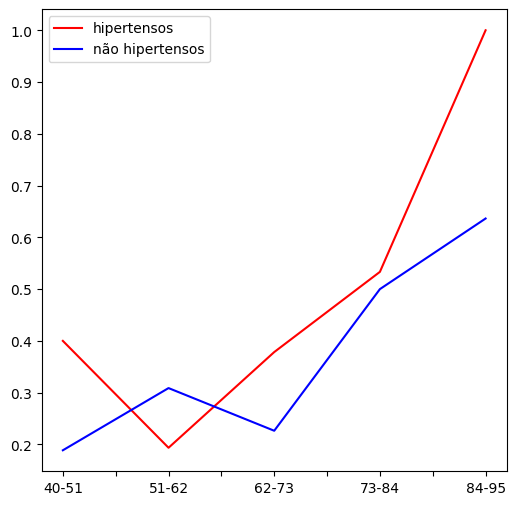

,hipertensão,taxa de morte
40-51,0,0.188679
40-51,1,0.400000
51-62,0,0.308824
51-62,1,0.193548
62-73,0,0.226415
62-73,1,0.378378
73-84,0,0.500000
73-84,1,0.533333
84-95,0,0.636364
84-95,1,1.000000


In [160]:
max = data['age'].max()
min = data['age'].min()
qnt_divs = 5
passo = (max - min)/qnt_divs

idades = []
taxa   = []
inicio = min
fim    = min + passo

for i in range(qnt_divs):
  conj_p_Faixa_idade = data.loc[(data['age'] <= fim) & (data['age'] >= inicio), ["age","high_blood_pressure","DEATH_EVENT"]]
  idade_hipertensão = conj_p_Faixa_idade.groupby(['high_blood_pressure'], as_index=False).mean() 
  taxa.append([int(idade_hipertensão.loc[[0]]["high_blood_pressure"]),float(idade_hipertensão.loc[[0]]["DEATH_EVENT"])])
  taxa.append([int(idade_hipertensão.loc[[1]]["high_blood_pressure"]),float(idade_hipertensão.loc[[1]]["DEATH_EVENT"])])
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  inicio = fim
  fim += passo

result = pd.DataFrame(taxa, index=idades, columns=["hipertensão","taxa de morte"])

comorbidade  = result.loc[(result['hipertensão'] == 1),['taxa de morte']]
nComorbidade = result.loc[(result['hipertensão'] == 0),['taxa de morte']]

fig, ax = plt.subplots(figsize=(6, 6))
comorbidade.plot(ax=ax, kind='line',y='taxa de morte',color='red' ,label='hipertensos')
nComorbidade.plot(ax=ax, kind='line',y='taxa de morte',color='blue',label='não hipertensos' )
plt.legend()
plt.show()
result

##Faixa de idade e pessoas que fumam

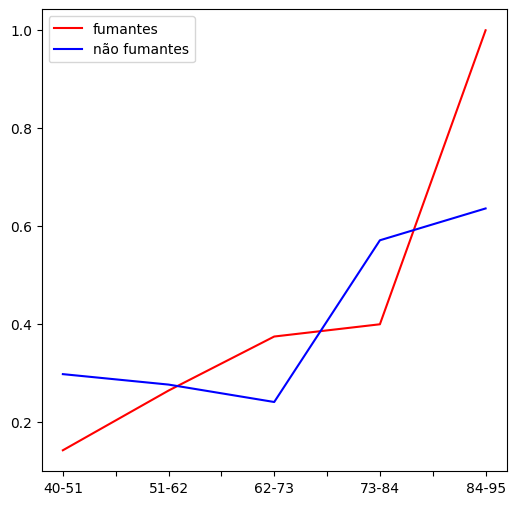

,fumantes,taxa de morte
40-51,0,0.298246
40-51,1,0.142857
51-62,0,0.276923
51-62,1,0.264706
62-73,0,0.241379
62-73,1,0.375000
73-84,0,0.571429
73-84,1,0.400000
84-95,0,0.636364
84-95,1,1.000000


In [161]:
max = data['age'].max()
min = data['age'].min()
qnt_divs = 5
passo = (max - min)/qnt_divs

idades = []
taxa   = []
inicio = min
fim    = min + passo

for i in range(qnt_divs):
  conj_p_Faixa_idade = data.loc[(data['age'] <= fim) & (data['age'] >= inicio), ["age","smoking","DEATH_EVENT"]]
  idade_fumante = conj_p_Faixa_idade.groupby(['smoking'], as_index=False).mean() 
  taxa.append([int(idade_fumante.loc[[0]]["smoking"]),float(idade_fumante.loc[[0]]["DEATH_EVENT"])])
  taxa.append([int(idade_fumante.loc[[1]]["smoking"]),float(idade_fumante.loc[[1]]["DEATH_EVENT"])])
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  inicio = fim
  fim += passo

result = pd.DataFrame(taxa, index=idades, columns=["fumantes","taxa de morte"])

comorbidade  = result.loc[(result['fumantes'] == 1),['taxa de morte']]
nComorbidade = result.loc[(result['fumantes'] == 0),['taxa de morte']]

fig, ax = plt.subplots(figsize=(6, 6))
comorbidade.plot(ax=ax, kind='line',y='taxa de morte',color='red' ,label='fumantes')
nComorbidade.plot(ax=ax, kind='line',y='taxa de morte',color='blue',label='não fumantes' )
plt.legend()
plt.show()
result

##Faixa de idade e pessoas com diabetes

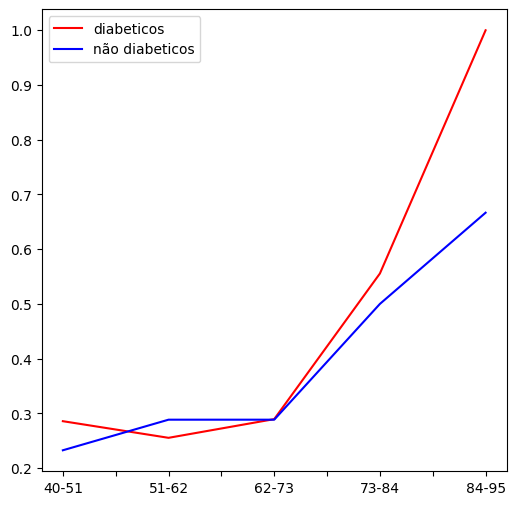

,diabeticos,taxa de morte
40-51,0,0.232558
40-51,1,0.285714
51-62,0,0.288462
51-62,1,0.255319
62-73,0,0.288462
62-73,1,0.289474
73-84,0,0.500000
73-84,1,0.555556
84-95,0,0.666667
84-95,1,1.000000


In [162]:
max = data['age'].max()
min = data['age'].min()
qnt_divs = 5
passo = (max - min)/qnt_divs

idades = []
taxa   = []
inicio = min
fim    = min + passo

for i in range(qnt_divs):
  conj_p_Faixa_idade = data.loc[(data['age'] <= fim) & (data['age'] >= inicio), ["age","diabetes","DEATH_EVENT"]]
  idade_diabetes = conj_p_Faixa_idade.groupby(['diabetes'], as_index=False).mean() 
  taxa.append([int(idade_diabetes.loc[[0]]["diabetes"]),float(idade_diabetes.loc[[0]]["DEATH_EVENT"])])
  taxa.append([int(idade_diabetes.loc[[1]]["diabetes"]),float(idade_diabetes.loc[[1]]["DEATH_EVENT"])])
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  inicio = fim
  fim += passo

result = pd.DataFrame(taxa, index=idades, columns=["diabeticos","taxa de morte"])

comorbidade  = result.loc[(result['diabeticos'] == 1),['taxa de morte']]
nComorbidade = result.loc[(result['diabeticos'] == 0),['taxa de morte']]

fig, ax = plt.subplots(figsize=(6, 6))
comorbidade.plot(ax=ax, kind='line',y='taxa de morte',color='red' ,label='diabeticos')
nComorbidade.plot(ax=ax, kind='line',y='taxa de morte',color='blue',label='não diabeticos' )
plt.legend()
plt.show()
result

##Faixa de idade e pessoas com anemia

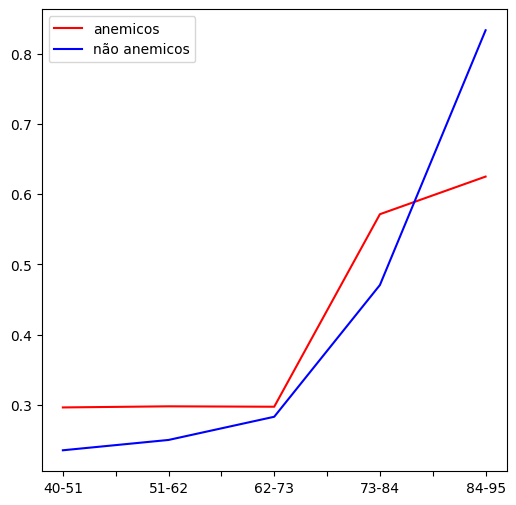

,anemia,taxa de morte
40-51,0,0.235294
40-51,1,0.296296
51-62,0,0.250000
51-62,1,0.297872
62-73,0,0.283019
62-73,1,0.297297
73-84,0,0.470588
73-84,1,0.571429
84-95,0,0.833333
84-95,1,0.625000


In [163]:
max = data['age'].max()
min = data['age'].min()
qnt_divs = 5
passo = (max - min)/qnt_divs

idades = []
taxa   = []
inicio = min
fim    = min + passo


for i in range(qnt_divs):
  conj_p_Faixa_idade = data.loc[(data['age'] <= fim) & (data['age'] >= inicio), ["age","anaemia","DEATH_EVENT"]]
  idade_anemia = conj_p_Faixa_idade.groupby(['anaemia'], as_index=False).mean() 
  taxa.append([int(idade_anemia.loc[[0]]["anaemia"]),float(idade_anemia.loc[[0]]["DEATH_EVENT"])])
  taxa.append([int(idade_anemia.loc[[1]]["anaemia"]),float(idade_anemia.loc[[1]]["DEATH_EVENT"])])
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  idades.append((str(int(inicio)) + "-" + str(int(fim))))
  inicio = fim
  fim += passo

result = pd.DataFrame(taxa, index=idades, columns=["anemia","taxa de morte"])

comorbidade  = result.loc[(result['anemia'] == 1),['taxa de morte']]
nComorbidade = result.loc[(result['anemia'] == 0),['taxa de morte']]

fig, ax = plt.subplots(figsize=(6, 6))
comorbidade.plot(ax=ax, kind='line',y='taxa de morte',color='red' ,label='anemicos')
nComorbidade.plot(ax=ax, kind='line',y='taxa de morte',color='blue',label='não anemicos' )
plt.legend()
plt.show()
result

Com essas análises, relacionando a faixa de idade com a variáveis não binarias, podemos observar que a idade é quem mais influencia na taxa de mortes, enquanto as variáveis não binárias influenciam pouco, sem contar que aumenta a taxa de possíveis outliers no dados principalmente com idades mais altas, onde o número de pessoas é menor

##Pessoas com hipertensão e níveis de creatinina sérica no sangue

<ipython-input-164-3dfc119aa88c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(hipert_serica2[["high_blood_pressure","DEATH_EVENT"]])


,high_blood_pressure,DEATH_EVENT
0.6-1.2,0,0.200000
0.6-1.2,1,0.236111
valores não saudáveis,0,0.463768
valores não saudáveis,1,0.666667


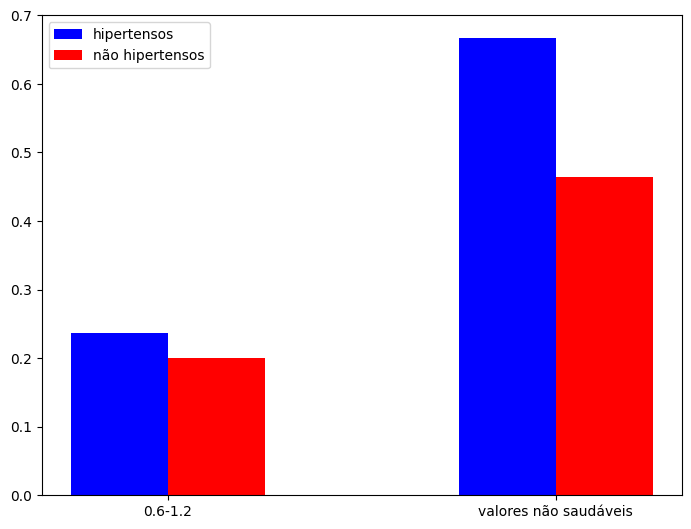

In [164]:
nivel1 = data.loc[(data['serum_creatinine'] <= 1.2) & (data['serum_creatinine'] >= 0.6),["serum_creatinine","high_blood_pressure","DEATH_EVENT"]]
nivel2 = data.loc[(data['serum_creatinine'] > 1.2) | (data['serum_creatinine'] < 0.6),["serum_creatinine","high_blood_pressure","DEATH_EVENT"]]

hipert_serica1 = nivel1.groupby(['high_blood_pressure'], as_index=False).mean() 
hipert_serica2 = nivel2.groupby(['high_blood_pressure'], as_index=False).mean() 
hipert_serica1 = hipert_serica1.rename(index={0: '0.6-1.2', 1: '0.6-1.2'})
hipert_serica2 = hipert_serica2.rename(index={0: 'valores não saudáveis', 1: 'valores não saudáveis'})

result = pd.DataFrame(hipert_serica1[["high_blood_pressure","DEATH_EVENT"]])
result = result.append(hipert_serica2[["high_blood_pressure","DEATH_EVENT"]])

comorbidade  = result.loc[(result['high_blood_pressure'] == 1),['DEATH_EVENT']]
nComorbidade = result.loc[(result['high_blood_pressure'] == 0),['DEATH_EVENT']]

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(X,['0.6-1.2','valores não saudáveis'])
ax.bar(X - 0.125, comorbidade['DEATH_EVENT'], color = 'b', width = 0.25, label="hipertensos")
ax.bar(X + 0.125, nComorbidade['DEATH_EVENT'], color = 'r', width = 0.25, label="não hipertensos" )
plt.legend()

result

##Pessoas com anemia e níveis de creatinina sérica no sangue

<ipython-input-165-9e49e077acfc>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(hipert_serica2[["anaemia","DEATH_EVENT"]])


,anaemia,DEATH_EVENT
0.6-1.2,0,0.187500
0.6-1.2,1,0.247059
valores não saudáveis,0,0.500000
valores não saudáveis,1,0.568182


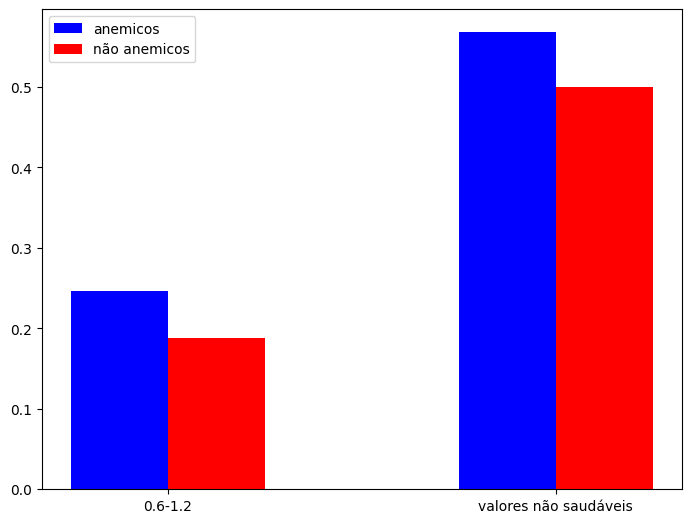

In [165]:
nivel1 = data.loc[(data['serum_creatinine'] <= 1.2) & (data['serum_creatinine'] >= 0.6),["serum_creatinine","anaemia","DEATH_EVENT"]]
nivel2 = data.loc[(data['serum_creatinine'] > 1.2) | (data['serum_creatinine'] < 0.6),["serum_creatinine","anaemia","DEATH_EVENT"]]

hipert_serica1 = nivel1.groupby(['anaemia'], as_index=False).mean() 
hipert_serica2 = nivel2.groupby(['anaemia'], as_index=False).mean() 
hipert_serica1 = hipert_serica1.rename(index={0: '0.6-1.2', 1: '0.6-1.2'})
hipert_serica2 = hipert_serica2.rename(index={0: 'valores não saudáveis', 1: 'valores não saudáveis'})

result = pd.DataFrame(hipert_serica1[["anaemia","DEATH_EVENT"]])
result = result.append(hipert_serica2[["anaemia","DEATH_EVENT"]])

comorbidade  = result.loc[(result['anaemia'] == 1),['DEATH_EVENT']]
nComorbidade = result.loc[(result['anaemia'] == 0),['DEATH_EVENT']]

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(X,['0.6-1.2','valores não saudáveis'])
ax.bar(X - 0.125, comorbidade['DEATH_EVENT'], color = 'b', width = 0.25, label="anemicos")
ax.bar(X + 0.125, nComorbidade['DEATH_EVENT'], color = 'r', width = 0.25, label="não anemicos" )
plt.legend()

result

##Pessoas com diabetes e níveis de creatinina sérica no sangue

<ipython-input-166-0a8ccd0698e9>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(hipert_serica2[["diabetes","DEATH_EVENT"]])


,diabetes,DEATH_EVENT
0.6-1.2,0,0.219298
0.6-1.2,1,0.204819
valores não saudáveis,0,0.516667
valores não saudáveis,1,0.547619


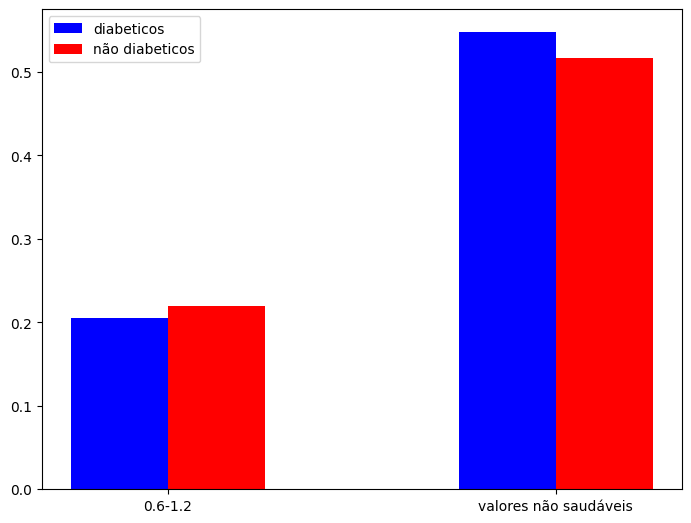

In [166]:
nivel1 = data.loc[(data['serum_creatinine'] <= 1.2) & (data['serum_creatinine'] >= 0.6),["serum_creatinine","diabetes","DEATH_EVENT"]]
nivel2 = data.loc[(data['serum_creatinine'] > 1.2) | (data['serum_creatinine'] < 0.6),["serum_creatinine","diabetes","DEATH_EVENT"]]

hipert_serica1 = nivel1.groupby(['diabetes'], as_index=False).mean() 
hipert_serica2 = nivel2.groupby(['diabetes'], as_index=False).mean() 
hipert_serica1 = hipert_serica1.rename(index={0: '0.6-1.2', 1: '0.6-1.2'})
hipert_serica2 = hipert_serica2.rename(index={0: 'valores não saudáveis', 1: 'valores não saudáveis'})


result = pd.DataFrame(hipert_serica1[["diabetes","DEATH_EVENT"]])
result = result.append(hipert_serica2[["diabetes","DEATH_EVENT"]])

comorbidade  = result.loc[(result['diabetes'] == 1),['DEATH_EVENT']]
nComorbidade = result.loc[(result['diabetes'] == 0),['DEATH_EVENT']]

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(X,['0.6-1.2','valores não saudáveis'])
ax.bar(X - 0.125, comorbidade['DEATH_EVENT'], color = 'b', width = 0.25, label="diabeticos")
ax.bar(X + 0.125, nComorbidade['DEATH_EVENT'], color = 'r', width = 0.25, label="não diabeticos" )
plt.legend()
result

##Pessoas que fumam e níveis de creatinina sérica no sangue

<ipython-input-167-9e3b37dcb58b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(hipert_serica2[["smoking","DEATH_EVENT"]])


,smoking,DEATH_EVENT
0.6-1.2,0,0.196970
0.6-1.2,1,0.246154
valores não saudáveis,0,0.563380
valores não saudáveis,1,0.451613


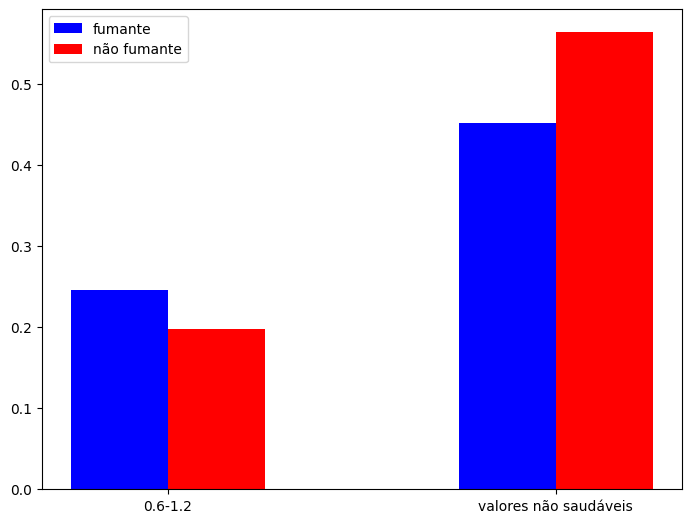

In [167]:
nivel1 = data.loc[(data['serum_creatinine'] <= 1.2) & (data['serum_creatinine'] >= 0.6),["serum_creatinine","smoking","DEATH_EVENT"]]
nivel2 = data.loc[(data['serum_creatinine'] > 1.2) | (data['serum_creatinine'] < 0.6),["serum_creatinine","smoking","DEATH_EVENT"]]

hipert_serica1 = nivel1.groupby(['smoking'], as_index=False).mean() 
hipert_serica2 = nivel2.groupby(['smoking'], as_index=False).mean() 
hipert_serica1 = hipert_serica1.rename(index={0: '0.6-1.2', 1: '0.6-1.2'})
hipert_serica2 = hipert_serica2.rename(index={0: 'valores não saudáveis', 1: 'valores não saudáveis'})

result = pd.DataFrame(hipert_serica1[["smoking","DEATH_EVENT"]])
result = result.append(hipert_serica2[["smoking","DEATH_EVENT"]])

comorbidade  = result.loc[(result['smoking'] == 1),['DEATH_EVENT']]
nComorbidade = result.loc[(result['smoking'] == 0),['DEATH_EVENT']]

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(X,['0.6-1.2','valores não saudáveis'])
ax.bar(X - 0.125, comorbidade['DEATH_EVENT'], color = 'b', width = 0.25, label="fumante")
ax.bar(X + 0.125, nComorbidade['DEATH_EVENT'], color = 'r', width = 0.25, label="não fumante" )
plt.legend()

result

Podemos chegar a uma conclusão semelheante a da combinação da faixa de idades com as variáveis não binárias utilizando uma outra variável binária, nível de creatinina sérica, combinada com as variáveis binárias não binária   

##Tempo de acompanhamento e a idade

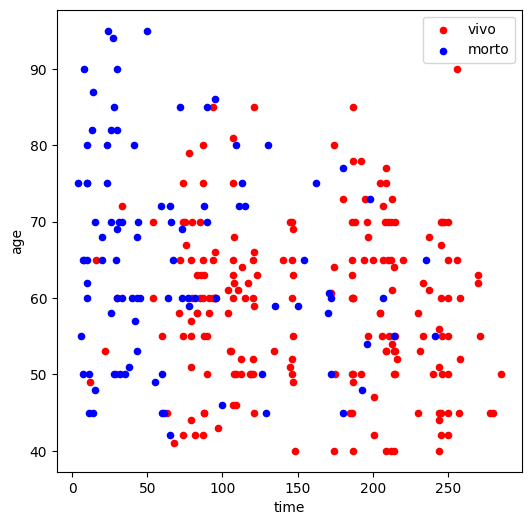

In [168]:
morto = data.loc[(data['DEATH_EVENT'] == 1), ['age','time']]
vivo  = data.loc[(data['DEATH_EVENT'] == 0), ['age','time']]

fig, ax = plt.subplots(figsize=(6, 6))
vivo.plot(ax=ax, kind='scatter',x='time',y='age',color='red' ,label='vivo')
morto.plot(ax=ax, kind='scatter',x='time',y='age',color='blue',label='morto' )
plt.legend()
plt.show()

Assim temos que no data frame dataset, as features escolhidas e categorizadas são as seguintes

In [169]:
dataset

,morreu,hipertensao,anemia,hipertensos e fumantes,idade,creatinina sérica,sódio sérico,plaquetas,fracao de ejecao,tempo
0,1,1,0,0,3,1,1,1,1,0
1,1,0,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,1,1,1,0
3,1,0,1,0,0,1,0,1,1,0
4,1,0,1,0,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
294,0,1,0,1,2,0,0,1,0,4
295,0,0,0,0,1,0,0,1,0,4
296,0,0,0,0,0,0,0,1,0,4
297,0,0,0,0,0,1,0,1,0,4


#Treinando e avaliando alguns modelos

Para treinarmos os modelos vamos dividir nosso conjunto de dados em 3 conjuntos, um para treino com 70% dos dados totais, um para validação com 20% e um para teste com 10% dos dados. Inicialmente vamos vero desempenho de dois modelos, ávore de decisão e floresta aletatória

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [220]:
x = dataset.drop("morreu", axis=1)
y = dataset["morreu"]

X_treino, X_resto, Y_treino, Y_resto = train_test_split(x, y, test_size=0.3, random_state=1)
X_valid, X_teste, Y_valid, Y_teste = train_test_split(X_resto, Y_resto, test_size=0.33, random_state=1)


acurácia: 78.33    mean square error: 21.67


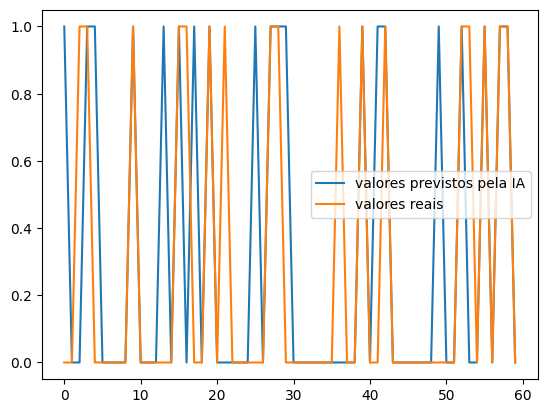

In [221]:
arvore_decisao = DecisionTreeClassifier()
arvore_decisao.fit(X_treino, Y_treino)

Y_pred = arvore_decisao.predict(X_valid)

acuracia = round(arvore_decisao.score(X_valid, Y_valid) * 100, 2)
mse_mlp = round(mean_squared_error(Y_valid, Y_pred) * 100, 2)
print("acurácia:",acuracia ,"   mean square error:", mse_mlp)

plt.plot(Y_pred, label="valores previstos pela IA")
plt.plot(Y_valid.values, label="valores reais")
plt.legend()
plt.show()

acurácia: 80.0    mean square error: 20.0


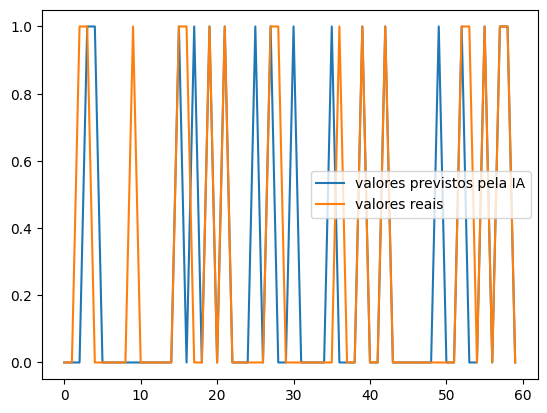

In [222]:
floresta_random = RandomForestClassifier(n_estimators=100)
floresta_random.fit(X_treino, Y_treino)

Y_pred = floresta_random.predict(X_valid)

acuracia = round(floresta_random.score(X_valid, Y_valid) * 100, 2)
mse_mlp = round(mean_squared_error(Y_valid, Y_pred) * 100, 2)
print("acurácia:",acuracia ,"   mean square error:", mse_mlp)

plt.plot(Y_pred, label="valores previstos pela IA")
plt.plot(Y_valid.values, label="valores reais")
plt.legend()
plt.show()

##Rede neural multi layer perceptron classifier

Para rede neural MLPClassifier, vamos inicialmente treina-la sem utilizar a tunagem dos hiperprâmetros

acurácia: 81.67    mean square error: 18.33


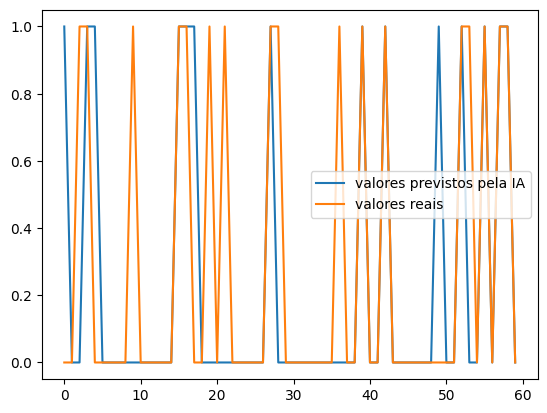

In [226]:
modelo = MLPClassifier()

modelo.fit(X_treino, Y_treino)

Y_pred = modelo.predict(X_valid)
acuracia = round(modelo.score(X_valid, Y_valid) * 100, 2)
mse_mlp = round(mean_squared_error(Y_valid, Y_pred) * 100, 2)
print("acurácia:",acuracia ,"   mean square error:", mse_mlp)

plt.plot(Y_pred, label="valores previstos pela IA")
plt.plot(Y_valid.values, label="valores reais")
plt.legend()
plt.show()

Com a tunagem dos hiperparâmetros podemos alcançar valores mais interessantes

Iteration 1, loss = 0.56631823
Iteration 2, loss = 0.54344468
Iteration 3, loss = 0.52484978
Iteration 4, loss = 0.51088608
Iteration 5, loss = 0.49963615
Iteration 6, loss = 0.49092298
Iteration 7, loss = 0.48208999
Iteration 8, loss = 0.47381318
Iteration 9, loss = 0.46701931
Iteration 10, loss = 0.46013416
Iteration 11, loss = 0.45429211
Iteration 12, loss = 0.44914710
Iteration 13, loss = 0.44425889
Iteration 14, loss = 0.43898612
Iteration 15, loss = 0.43404685
Iteration 16, loss = 0.42925884
Iteration 17, loss = 0.42528708
Iteration 18, loss = 0.42148430
Iteration 19, loss = 0.41790785
Iteration 20, loss = 0.41416322
Iteration 21, loss = 0.41125609
Iteration 22, loss = 0.40995029
Iteration 23, loss = 0.40860108
Iteration 24, loss = 0.40647105
Iteration 25, loss = 0.40355649
Iteration 26, loss = 0.39989187
Iteration 27, loss = 0.39627109
Iteration 28, loss = 0.39308731
Iteration 29, loss = 0.39121811
Iteration 30, loss = 0.38911123
Iteration 31, loss = 0.38762801
Iteration 32, los

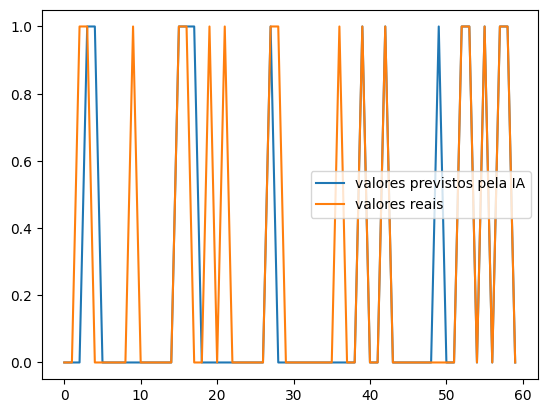

In [227]:
modelo = MLPClassifier(hidden_layer_sizes=(20),
                       activation='relu',
                       solver='adam',
                       learning_rate_init=0.005,
                       max_iter = 1000,
                       random_state=2018,
                       verbose = 10)

modelo.fit(X_treino, Y_treino)

Y_pred = modelo.predict(X_valid)
acuracia = round(modelo.score(X_valid, Y_valid) * 100, 2)
mse_mlp = round(mean_squared_error(Y_valid, Y_pred) * 100, 2)
print("acurácia:",acuracia ,"   mean square error:", mse_mlp)

plt.plot(Y_pred, label="valores previstos pela IA")
plt.plot(Y_valid.values, label="valores reais")
plt.legend()
plt.show()

Podemos notar que as variáveis binárias apresentam um grau de influência na taxa de mortes bem menor se comparada a taxa das variáveis não binárias, dessa forma vamos remover essas variáveis do data frame de treino e de validação e assim avaliar se elas fazem diferença no treinamento do modelo

In [223]:
X_treino_drop = X_treino.drop(['hipertensao','anemia','hipertensos e fumantes'],axis=1)
X_valid_drop = X_valid.drop(['hipertensao','anemia','hipertensos e fumantes'],axis=1)
X_teste_drop = X_teste.drop(['hipertensao','anemia','hipertensos e fumantes'],axis=1)


acurácia: 78.33    mean square error: 21.67


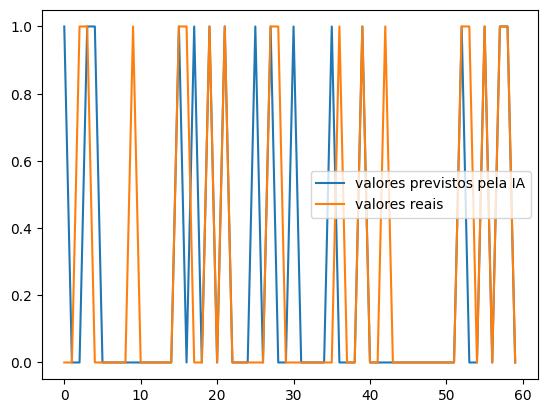

In [224]:
arvore_decisao.fit(X_treino_drop, Y_treino)

Y_pred = arvore_decisao.predict(X_valid_drop)

acuracia = round(arvore_decisao.score(X_valid_drop, Y_valid) * 100, 2)
mse_mlp = round(mean_squared_error(Y_valid, Y_pred) * 100, 2)
print("acurácia:",acuracia ,"   mean square error:", mse_mlp)

plt.plot(Y_pred, label="valores previstos pela IA")
plt.plot(Y_valid.values, label="valores reais")
plt.legend()
plt.show()

acurácia: 83.33    mean square error: 16.67


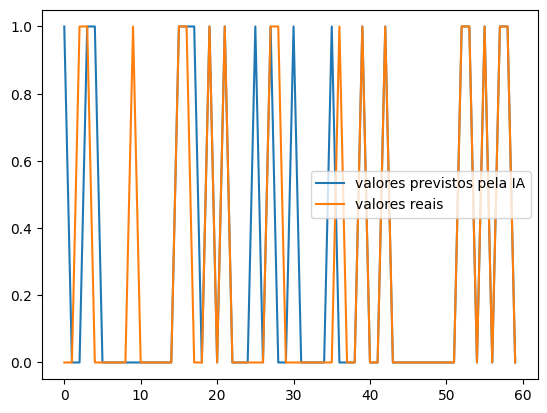

In [225]:
floresta_random.fit(X_treino_drop, Y_treino)

Y_pred = floresta_random.predict(X_valid_drop)

acuracia = round(floresta_random.score(X_valid_drop, Y_valid) * 100, 2)
mse_mlp = round(mean_squared_error(Y_valid, Y_pred) * 100, 2)
print("acurácia:",acuracia ,"   mean square error:", mse_mlp)

plt.plot(Y_pred, label="valores previstos pela IA")
plt.plot(Y_valid.values, label="valores reais")
plt.legend()
plt.show()

Iteration 1, loss = 0.62274375
Iteration 2, loss = 0.57502585
Iteration 3, loss = 0.54339093
Iteration 4, loss = 0.52049242
Iteration 5, loss = 0.50442558
Iteration 6, loss = 0.49087578
Iteration 7, loss = 0.47977725
Iteration 8, loss = 0.47131045
Iteration 9, loss = 0.46242896
Iteration 10, loss = 0.45265380
Iteration 11, loss = 0.44268517
Iteration 12, loss = 0.43428764
Iteration 13, loss = 0.42668306
Iteration 14, loss = 0.41944710
Iteration 15, loss = 0.41229864
Iteration 16, loss = 0.40613900
Iteration 17, loss = 0.40064661
Iteration 18, loss = 0.39826511
Iteration 19, loss = 0.39814997
Iteration 20, loss = 0.39762165
Iteration 21, loss = 0.39743840
Iteration 22, loss = 0.39734482
Iteration 23, loss = 0.39592903
Iteration 24, loss = 0.39339387
Iteration 25, loss = 0.38915425
Iteration 26, loss = 0.38429397
Iteration 27, loss = 0.37964644
Iteration 28, loss = 0.37580087
Iteration 29, loss = 0.37348420
Iteration 30, loss = 0.37352582
Iteration 31, loss = 0.37557253
Iteration 32, los

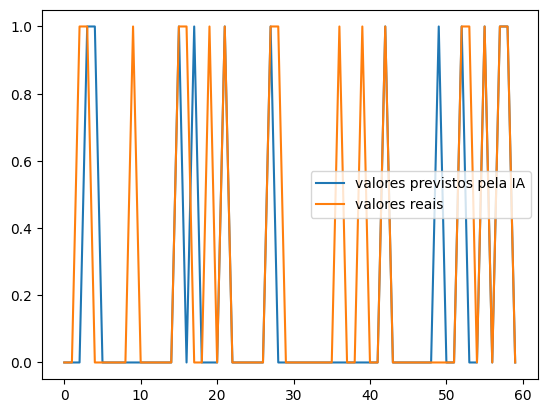

In [228]:
modelo.fit(X_treino_drop, Y_treino)

Y_pred = modelo.predict(X_valid_drop)

acuracia = round(modelo.score(X_valid_drop, Y_valid) * 100, 2)
mse_mlp = round(mean_squared_error(Y_valid, Y_pred) * 100, 2)
print("acurácia:",acuracia ,"   mean square error:", mse_mlp)

plt.plot(Y_pred, label="valores previstos pela IA")
plt.plot(Y_valid.values, label="valores reais")
plt.legend()
plt.show()

Com a diminuição das features conseguimos notar uma melhora no resultado de um dos modelos, piora em um e no outro o resultado permaneceu o mesmo. Devido a pequena quantidade de dados não podemos afirmar que os valores binários não são tão importantes para o treinamento dos modelos